In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [306]:
df= pd.read_csv('data/data.csv')

In [307]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [309]:
cols_to_convert = df.columns[df.dtypes == 'object'].drop('timestamp')
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df[cols_to_convert].isna().sum()

equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
dtype: int64

In [310]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [311]:
df.describe()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15880.000000,15928.000000,15845.000000,15903.000000,15871.000000,15926.000000,15991.000000,15912.000000,15978.000000,16014.000000,...,16018.000000,15903.000000,15987.000000,15948.000000,15995.000000,15967.000000,15980.000000,15966.000000,15965.000000,15966.000000
mean,95.787256,3.935337,21.248633,39.046351,19.792984,39.488571,21.666530,38.197731,20.240384,37.942745,...,18.850306,40.315025,6.219168,755.760290,78.959506,4.196572,38.445121,2.780896,24.884603,25.114924
std,182.525447,14.599022,2.163772,9.967177,2.935683,10.143412,2.595276,10.157313,2.778673,10.788318,...,2.532307,11.189337,7.563162,13.664262,28.586422,4.415527,21.259284,6.084598,26.177152,25.507229
min,-1139.985693,-86.002966,8.726818,-46.660000,2.988199,-77.265503,6.543921,-71.406273,4.613485,-81.446225,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,50.000000,0.000000,20.500000,37.025833,18.600000,37.745000,20.533333,36.590000,19.266875,35.193333,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.202974,12.212968
50%,60.000000,0.000000,21.323333,39.230000,19.600000,40.295833,21.767500,38.400000,20.290000,38.090000,...,18.890000,40.363333,6.000000,756.216667,84.166667,4.000000,40.000000,2.750000,24.874799,24.838493
75%,100.000000,0.000000,22.100000,42.500000,20.790000,43.000000,22.760000,41.433333,21.356667,41.566667,...,20.200000,43.790000,9.250000,762.100000,91.976190,6.000000,40.000000,5.300000,37.957598,37.977074
max,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,81.446225,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [312]:
df_null = pd.DataFrame(df.isnull().sum(),columns=['no_null'])
null_percentage=pd.DataFrame(df.isnull().mean() * 100,columns=['null_percentage'])
concated= pd.concat([df_null,null_percentage],axis=1)
concated

,no_null,null_percentage
timestamp,0,0.000000
equipment_energy_consumption,909,5.414259
lighting_energy,861,5.128358
zone1_temperature,944,5.622729
zone1_humidity,886,5.277265
zone2_temperature,918,5.467866
zone2_humidity,863,5.140270
zone3_temperature,798,4.753112
zone3_humidity,877,5.223658
zone4_temperature,811,4.830544


In [313]:
df.dropna(inplace=True)

In [314]:
neg_cols = df.select_dtypes(include=['float64', 'int64']).columns
neg_cols_with_negatives = df[neg_cols].columns[(df[neg_cols] < 0).any()].tolist()
print(neg_cols_with_negatives)
print(len(neg_cols_with_negatives))


can_neg_val =['zone6_temperature','visibility_index','wind_speed', 'visibility_index', 'random_variable1', 'random_variable2','dew_point','outdoor_temperature']
for col in neg_cols_with_negatives:
  if col not in can_neg_val:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)


['equipment_energy_consumption', 'lighting_energy', 'zone1_humidity', 'zone2_humidity', 'zone3_humidity', 'zone4_humidity', 'zone5_humidity', 'zone6_temperature', 'zone6_humidity', 'zone7_humidity', 'zone8_humidity', 'zone9_humidity', 'outdoor_temperature', 'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point', 'random_variable1', 'random_variable2']
19


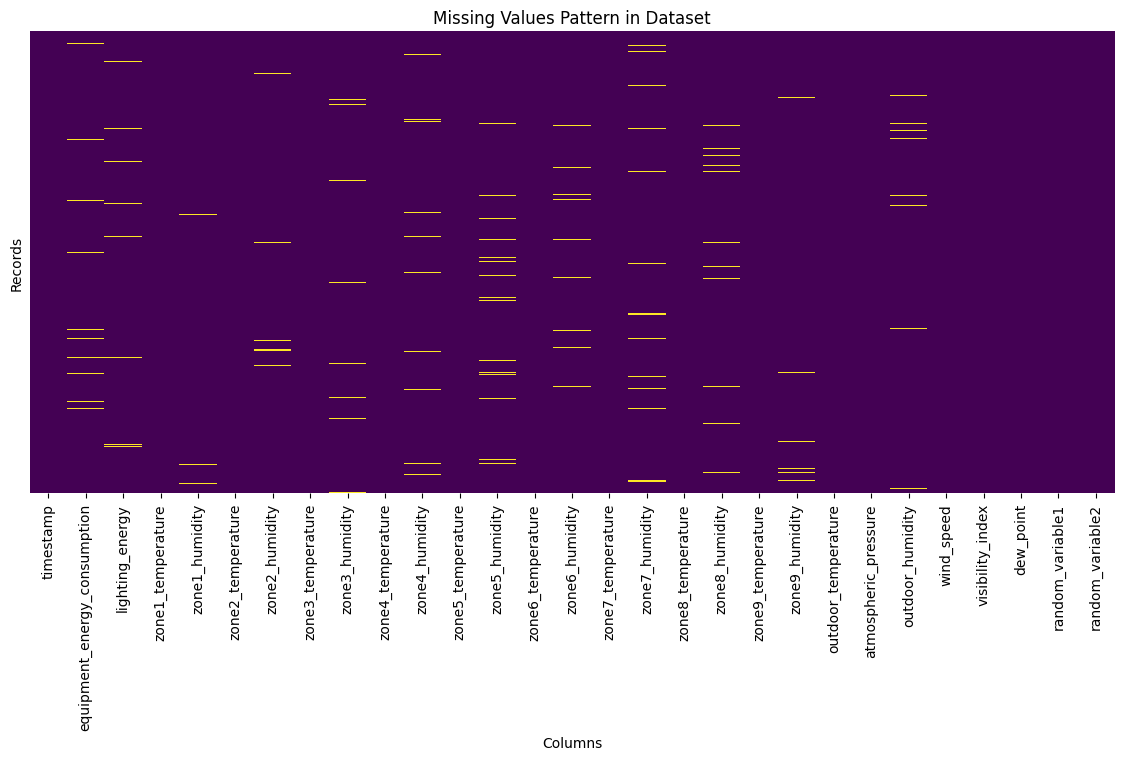

In [315]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Pattern in Dataset')
plt.xlabel('Columns')
plt.ylabel('Records')
plt.show()

In [316]:
# cols_to_plot = df.columns

# plt.figure(figsize=(14, 10))
# for i, col in enumerate(cols_to_plot):
#     plt.subplot(6,5, i + 1)
#     sns.histplot(df[col], kde=True, bins=30)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

In [317]:
null_columns = df.columns[df.isnull().any()]
skew_values=df[null_columns].skew(numeric_only=True)
symmetric_columns=skew_values[skew_values.between(-0.5, 0.5)].index.tolist()
skewed_columns=[col for col in null_columns if col not in symmetric_columns]


To choose between mean (for symmetric) or median (for skewed) imputation methods.

In [318]:
skew_values

equipment_energy_consumption    4.675433
lighting_energy                 4.240220
zone1_humidity                 -0.333307
zone2_humidity                 -0.064186
zone3_humidity                  0.218899
zone4_humidity                  3.696184
zone5_humidity                  4.128226
zone6_humidity                  3.371199
zone7_humidity                  3.455731
zone8_humidity                  3.595461
zone9_humidity                  0.661376
outdoor_humidity                2.950195
dtype: float64

Fill missing values with mean or median based on distribution skewness.

In [319]:
# from sklearn.impute import SimpleImputer
# mean_imputer = SimpleImputer(strategy='mean')
# median_imputer = SimpleImputer(strategy='median')

# df[symmetric_columns] = mean_imputer.fit_transform(df[symmetric_columns])
# df[skewed_columns] = median_imputer.fit_transform(df[skewed_columns])

In [320]:
# cols_to_plot = df.columns

# plt.figure(figsize=(14, 10))
# for i, col in enumerate(cols_to_plot):
#     plt.subplot(6,5, i + 1)
#     sns.histplot(df[col], kde=True, bins=30)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()

In [321]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday
df.drop('timestamp', axis=1, inplace=True)

 Extract time features (hour, day, month, weekday) for temporal analysis. 

In [322]:
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,day,month,weekday
4,60.0,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.89,45.530000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,17,11,1,0
7,60.0,50.0,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.89,45.863333,...,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,18,11,1,0
12,430.0,50.0,20.133333,48.000000,19.566667,44.400000,19.890000,44.900000,19.00,46.363333,...,91.000000,6.000000,40.000000,4.600000,34.351142,34.351142,19,11,1,0
14,100.0,10.0,20.426667,55.893333,19.856667,45.833333,20.033333,47.526667,19.00,48.696667,...,90.000000,6.000000,-82.329792,4.433333,38.492071,38.492071,19,11,1,0
17,70.0,30.0,20.856667,53.660000,20.200000,47.056667,20.200000,48.447500,18.89,47.963333,...,88.500000,6.000000,40.000000,4.183333,49.595305,49.595305,19,11,1,0


In [323]:
#zone_temperature = add every zone temperature
df['zone_temperature']=(df['zone1_temperature']+df['zone2_temperature']+df['zone3_temperature']+df['zone4_temperature']+df['zone5_temperature']+df['zone6_temperature']+df['zone7_temperature']+df['zone8_temperature']+df['zone9_temperature'])/9
df.drop(columns=['zone1_temperature','zone2_temperature','zone3_temperature','zone4_temperature','zone5_temperature','zone6_temperature','zone7_temperature','zone8_temperature','zone9_temperature'],inplace=True)

 Reduce dimensionality and simplify representation by averaging zone readings.

In [324]:
#add like the zone temperature
df['zone_humidity']=(df['zone1_humidity']+df['zone2_humidity']+df['zone3_humidity']+df['zone4_humidity']+df['zone5_humidity']+df['zone6_humidity']+df['zone7_humidity']+df['zone8_humidity']+df['zone9_humidity'])/9
df.drop(columns=['zone1_humidity','zone2_humidity','zone3_humidity','zone4_humidity','zone5_humidity','zone6_humidity','zone7_humidity','zone8_humidity','zone9_humidity'],inplace=True)

In [325]:
df.columns


Index(['equipment_energy_consumption', 'lighting_energy',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2', 'hour', 'day', 'month', 'weekday',
       'zone_temperature', 'zone_humidity'],
      dtype='object')

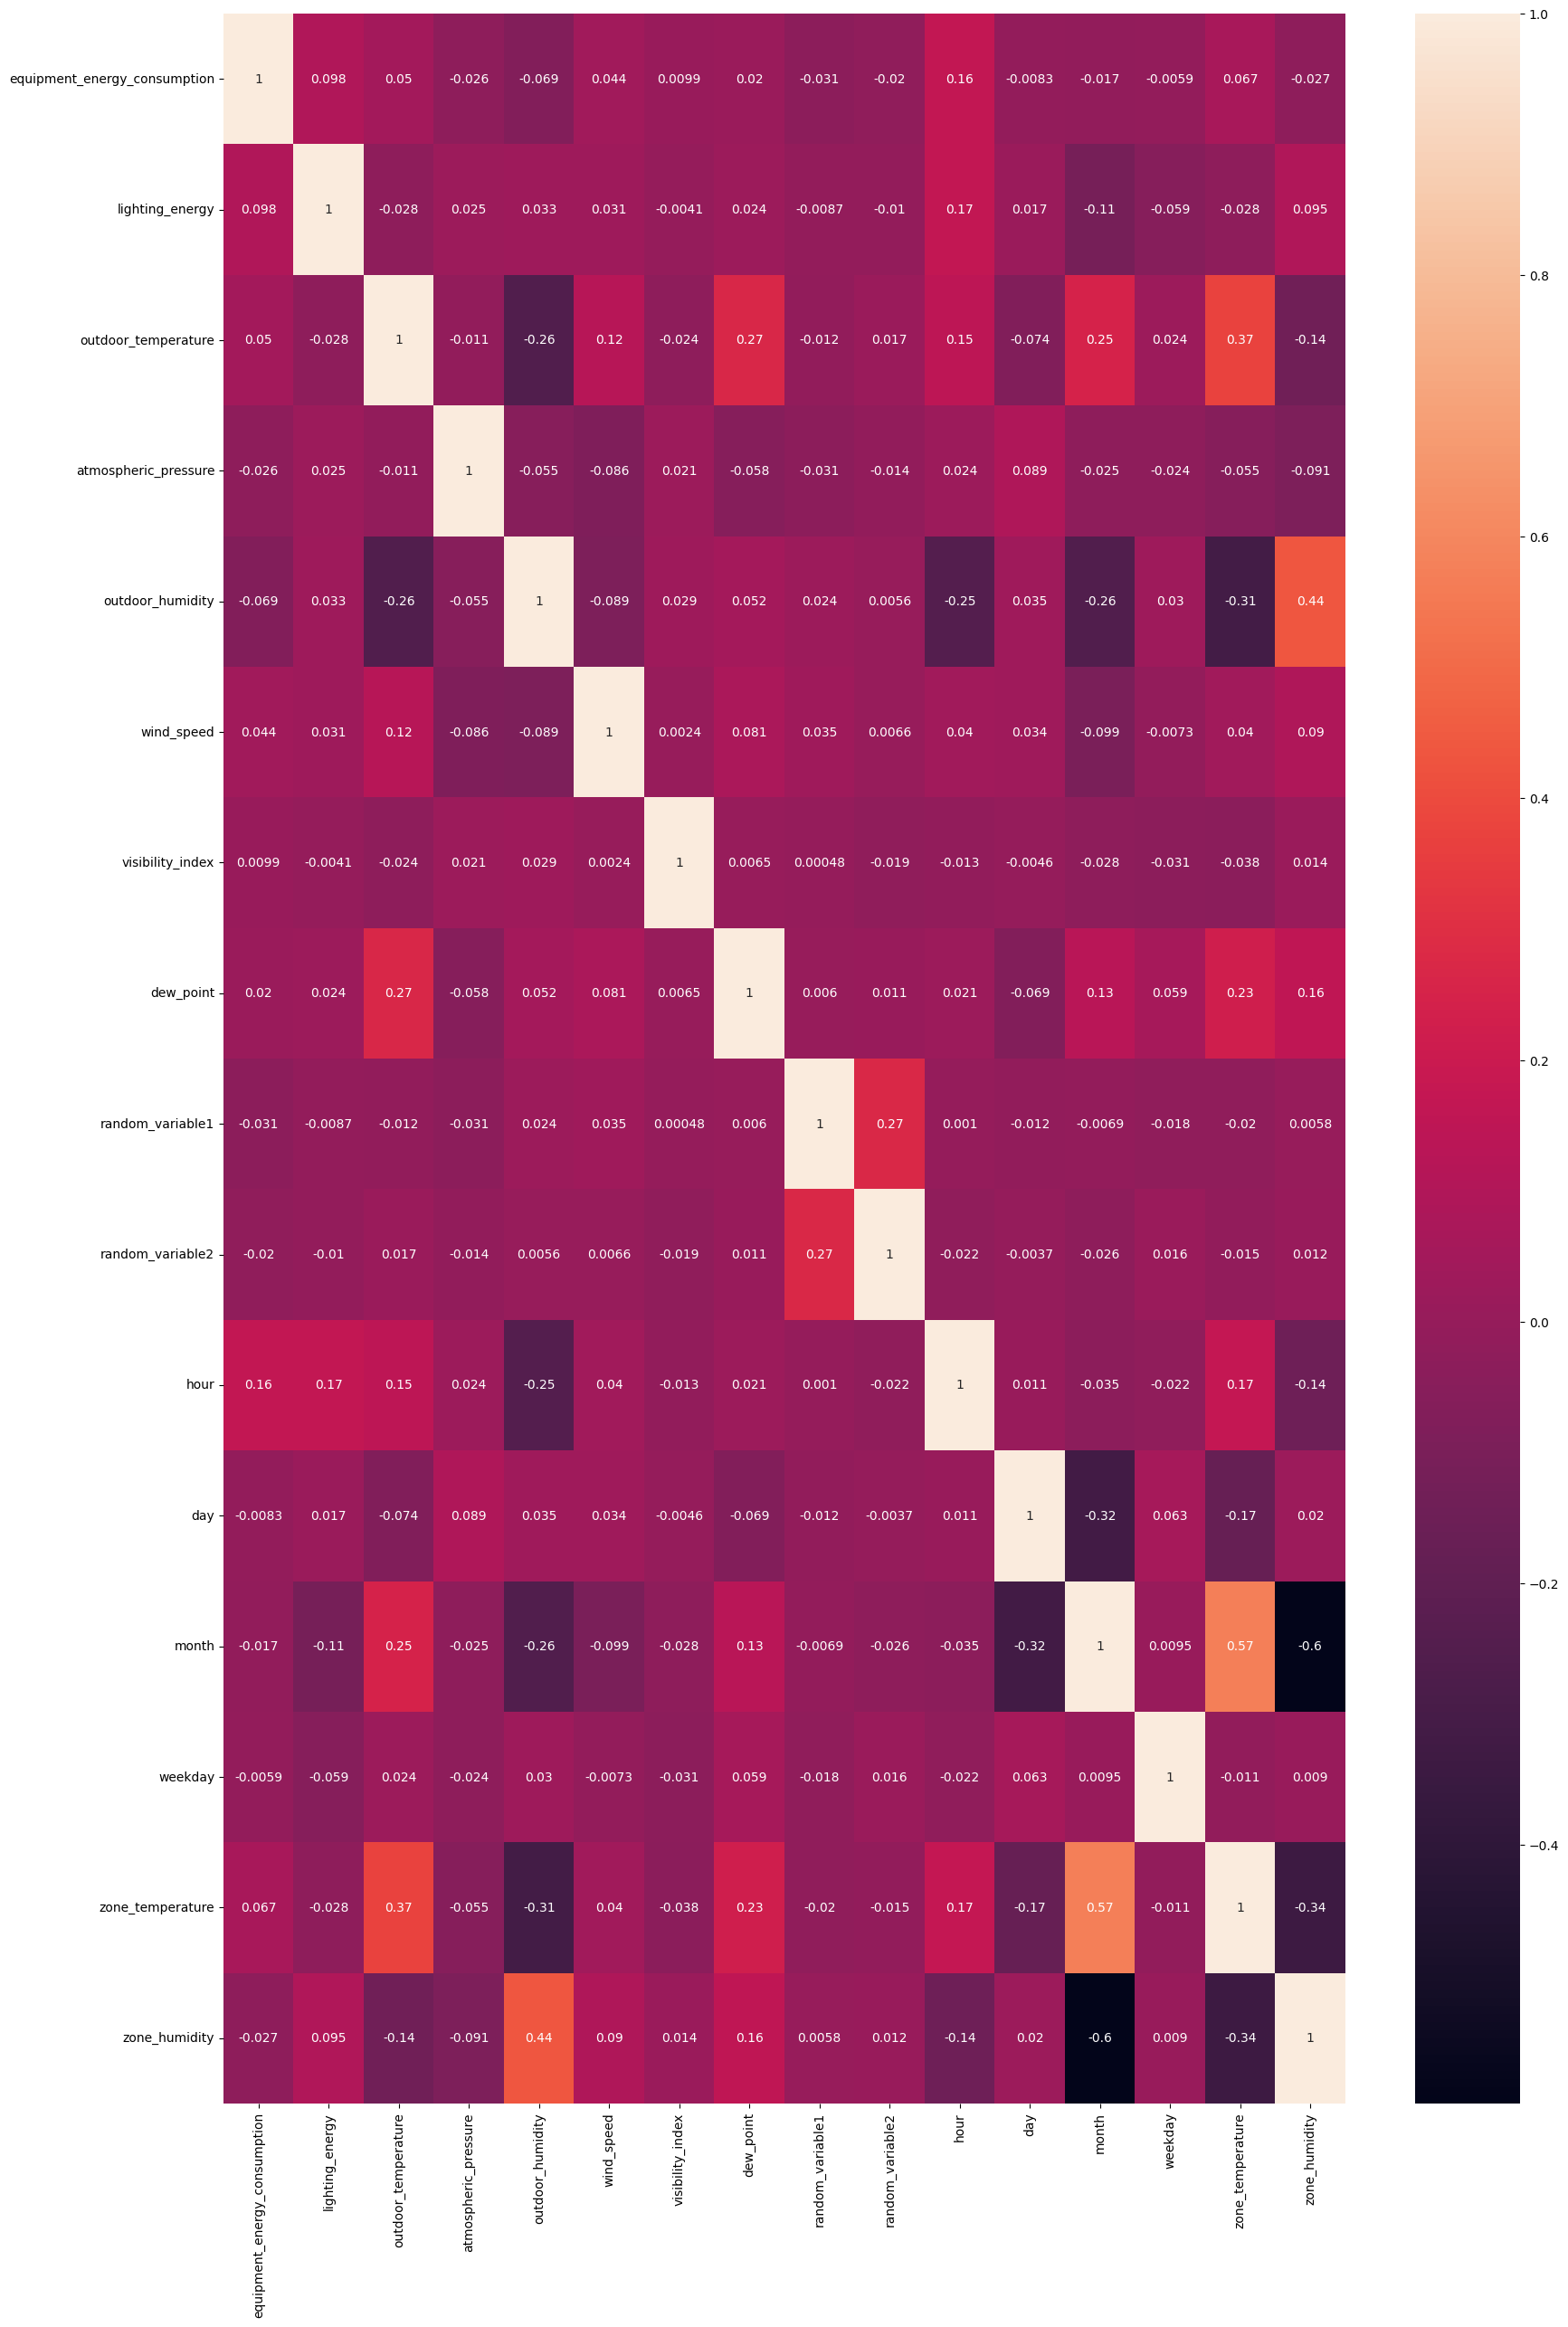

In [326]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(), annot=True);

Identify relationships between variables for feature selection.

In [327]:

correlation_matrix=df.corr()
correlation_matrix

,equipment_energy_consumption,lighting_energy,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,day,month,weekday,zone_temperature,zone_humidity
equipment_energy_consumption,1.000000,0.098109,0.049822,-0.025710,-0.068507,0.044038,0.009871,0.019958,-0.030853,-0.020403,0.164521,-0.008321,-0.016799,-0.005943,0.066842,-0.027144
lighting_energy,0.098109,1.000000,-0.028224,0.024790,0.032572,0.030847,-0.004096,0.024330,-0.008732,-0.010344,0.165475,0.016770,-0.113369,-0.058862,-0.028484,0.095253
outdoor_temperature,0.049822,-0.028224,1.000000,-0.011175,-0.260585,0.121951,-0.023597,0.268442,-0.012308,0.016628,0.145171,-0.073927,0.246842,0.024441,0.370668,-0.138238
atmospheric_pressure,-0.025710,0.024790,-0.011175,1.000000,-0.054559,-0.085740,0.021331,-0.057967,-0.031430,-0.014176,0.024084,0.088883,-0.025271,-0.024188,-0.055462,-0.091362
outdoor_humidity,-0.068507,0.032572,-0.260585,-0.054559,1.000000,-0.088965,0.028733,0.051689,0.023732,0.005592,-0.248141,0.034703,-0.256184,0.029643,-0.311762,0.435788
wind_speed,0.044038,0.030847,0.121951,-0.085740,-0.088965,1.000000,0.002430,0.080639,0.034909,0.006604,0.039914,0.033711,-0.098785,-0.007289,0.039735,0.090105
visibility_index,0.009871,-0.004096,-0.023597,0.021331,0.028733,0.002430,1.000000,0.006507,0.000478,-0.018968,-0.012622,-0.004620,-0.028430,-0.030669,-0.037520,0.014304
dew_point,0.019958,0.024330,0.268442,-0.057967,0.051689,0.080639,0.006507,1.000000,0.006035,0.010547,0.021191,-0.068619,0.128283,0.058788,0.225278,0.155141
random_variable1,-0.030853,-0.008732,-0.012308,-0.031430,0.023732,0.034909,0.000478,0.006035,1.000000,0.271152,0.001050,-0.011982,-0.006932,-0.017784,-0.019737,0.005842
random_variable2,-0.020403,-0.010344,0.016628,-0.014176,0.005592,0.006604,-0.018968,0.010547,0.271152,1.000000,-0.021740,-0.003689,-0.025946,0.015988,-0.014551,0.012403


random_variable1: --0.030853 (equipment), -0.008732 (lighting).

random_variable2: -0.020403 (equipment), -0.020403 (lighting). Negligible correlations with both targets:

visibility_index :0.0047 (equipment), 0.0071 (lighting). Weak correlation with targets:

atmospheric_pressure:-0.015 (equipment), -0.006 (lighting).

day: -0.009 (equipment), -0.029 (lighting).

weekday: -0.015 (equipment), -0.059 (lighting).

dew_point :Weak correlation with targets (0.006 for equipment, 0.010 for lighting) and Moderately correlated with outdoor_temperature (0.228), but temperature is already a stronger predictor.

month Overlaps with zone_temperature Weak correlation with targets (0.006 for equipment, 0.010 for lighting).

In [328]:
df.drop(columns=['outdoor_humidity', 'wind_speed', 'random_variable1', 'random_variable2',
    'visibility_index', 'atmospheric_pressure', 'day', 'weekday', 'dew_point', 'month'
],inplace=True)

In [329]:

len(df.columns)

6

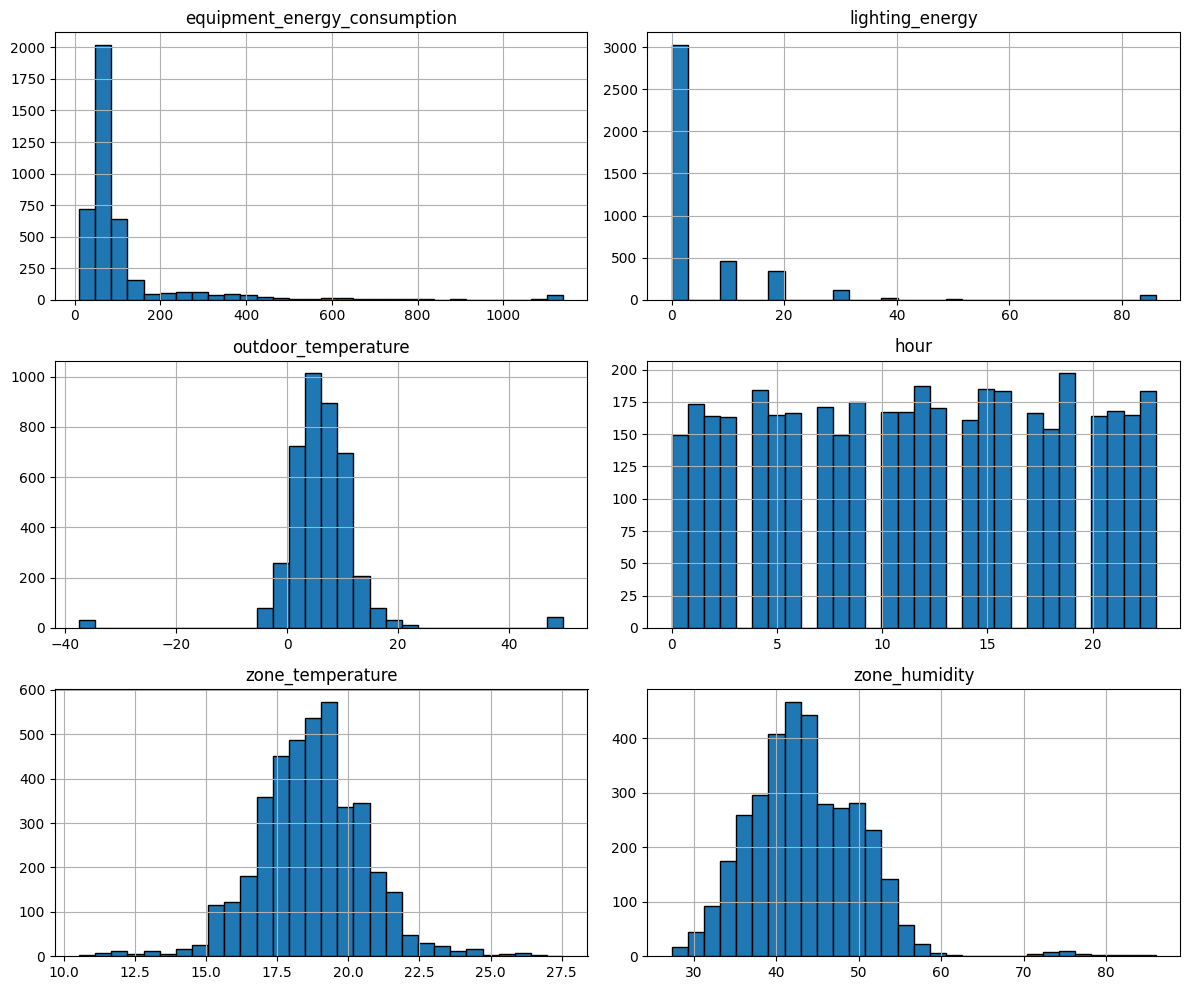

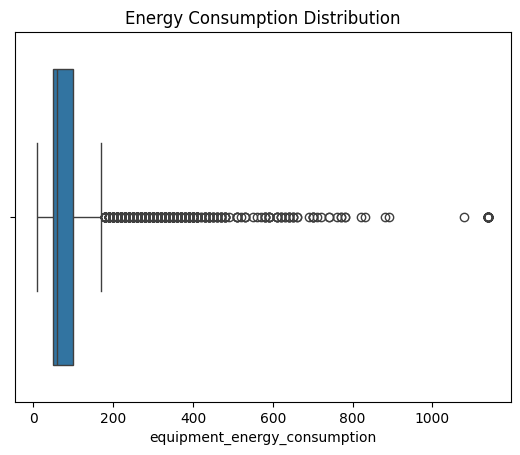

In [330]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()
sns.boxplot(x=df['equipment_energy_consumption'])
plt.title('Energy Consumption Distribution')
plt.show()

Visualize distribution and detect outliers.

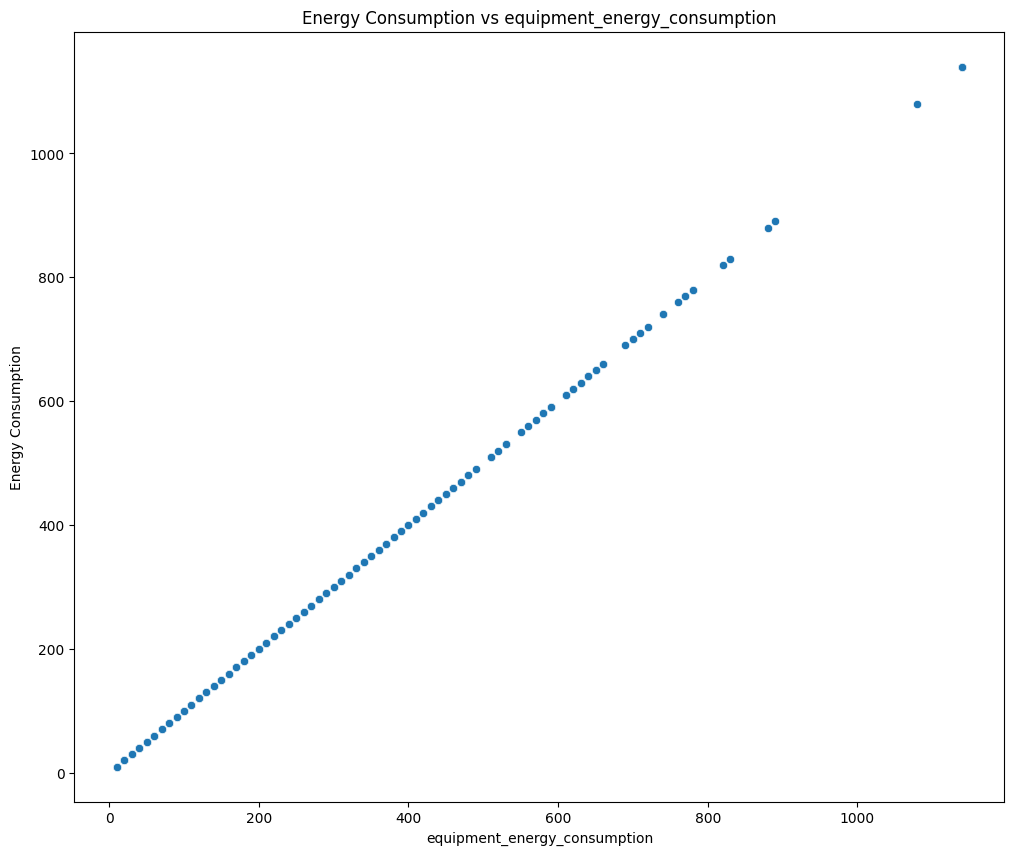

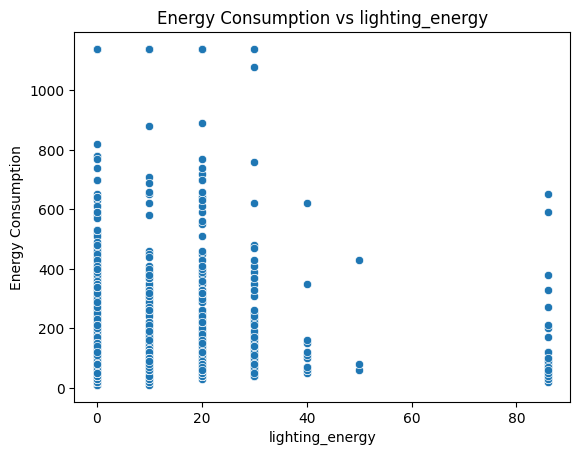

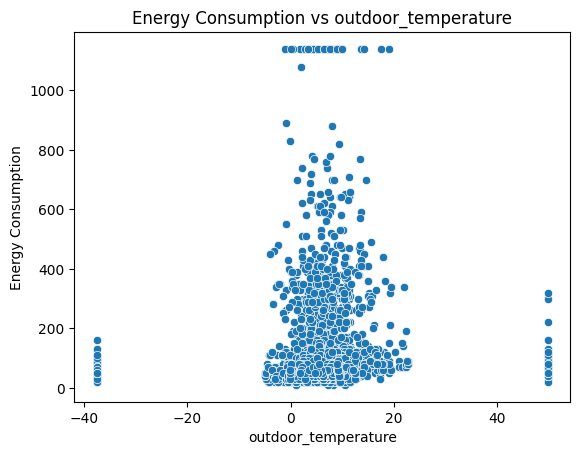

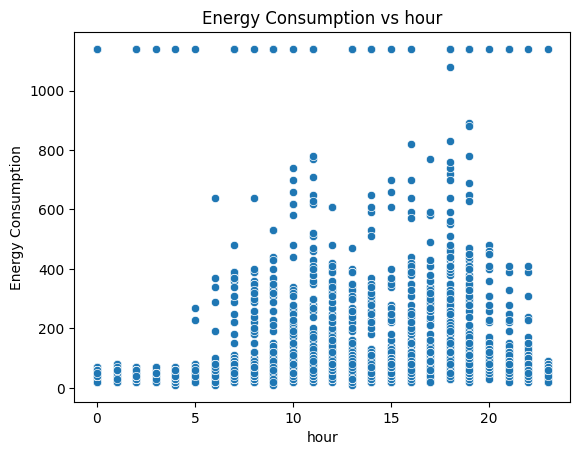

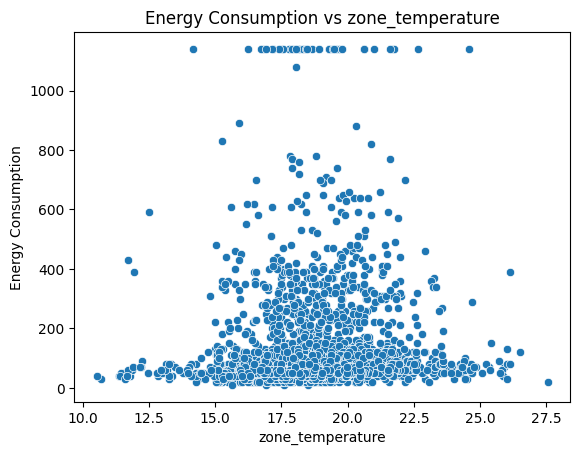

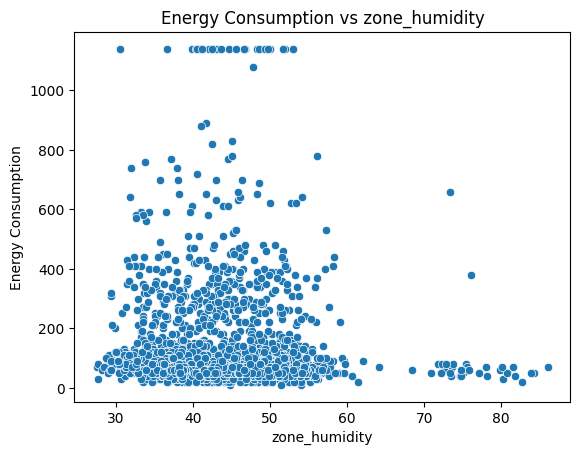

In [331]:
plt.figure(figsize=(12,10))
for feature in df.columns:
 
    sns.scatterplot(x=df[feature], y=df['equipment_energy_consumption'])
    plt.title(f'Energy Consumption vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Energy Consumption')
    plt.show()

 Analyze how different features correlate with energy consumption.

 Detect outliers in all variables visually.

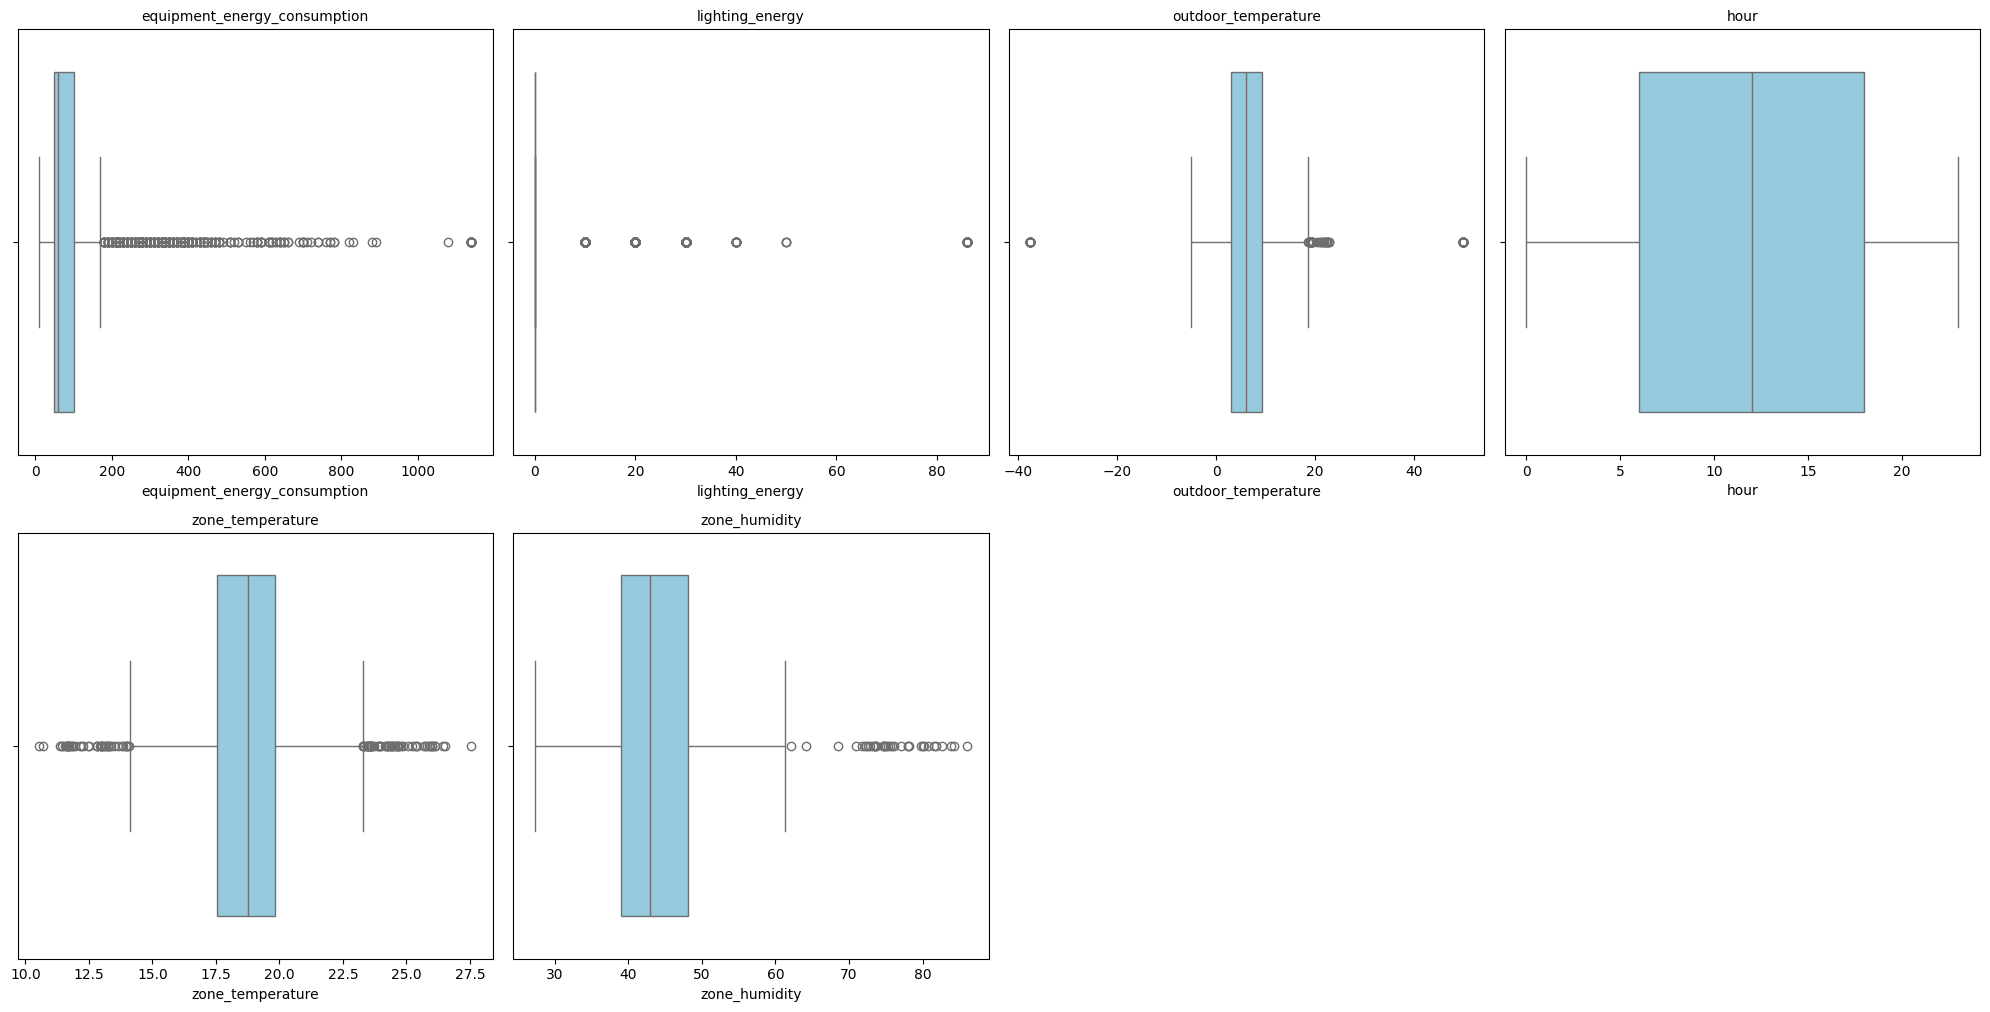

In [332]:
plt.figure(figsize=(20, 40))
for i, column in enumerate(df.columns):
    plt.subplot(8, 4, i + 1)
    sns.boxplot(data=df[column], orient='h', color="skyblue")
    plt.title(column, fontsize=10)
    plt.tight_layout()

plt.show()

 Remove extreme values that distort statistical models.

In [333]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [334]:
df.columns

Index(['equipment_energy_consumption', 'lighting_energy',
       'outdoor_temperature', 'hour', 'zone_temperature', 'zone_humidity'],
      dtype='object')

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4076 entries, 4 to 16855
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  3990 non-null   float64
 1   lighting_energy               4008 non-null   float64
 2   outdoor_temperature           4076 non-null   float64
 3   hour                          4076 non-null   int32  
 4   zone_temperature              4076 non-null   float64
 5   zone_humidity                 3531 non-null   float64
dtypes: float64(5), int32(1)
memory usage: 207.0 KB


In [337]:
for col in df.columns:
    df=remove_outliers_iqr(df, col)


Visualize relationships and correlations between important variables.

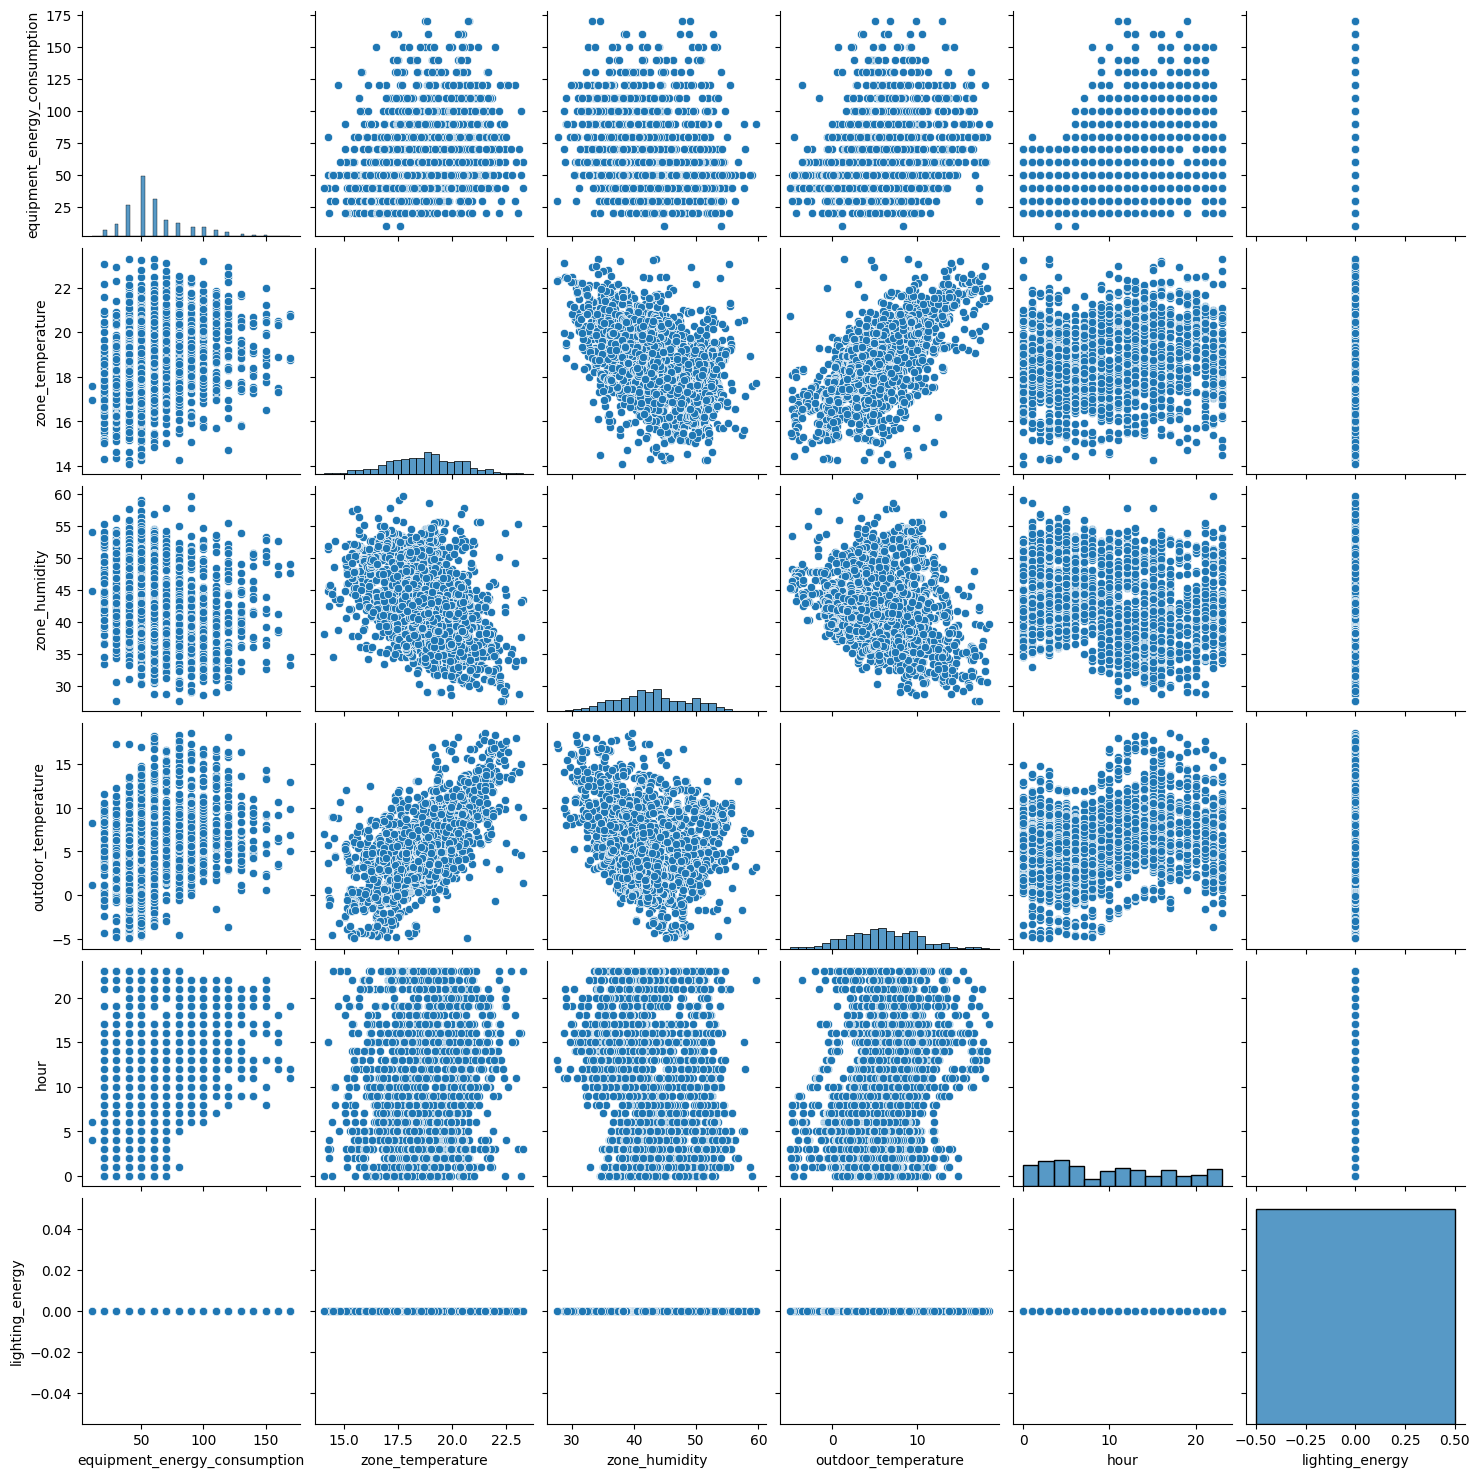

In [340]:
# Pair plot for selected features
sns.pairplot(df[['equipment_energy_consumption', 'zone_temperature', 'zone_humidity', 'outdoor_temperature','hour','lighting_energy']])
plt.show()

In [341]:
#Drop Constant Columns
df.drop(columns=['lighting_energy'],inplace=True)

In [343]:
df.describe()

,equipment_energy_consumption,outdoor_temperature,hour,zone_temperature,zone_humidity
count,2153.000000,2153.000000,2153.000000,2153.000000,2153.000000
mean,61.393405,5.971782,10.183465,18.705018,42.872531
std,26.221283,4.234339,6.943363,1.626542,5.807882
min,10.000000,-4.966667,0.000000,14.104473,27.683704
25%,50.000000,2.933333,4.000000,17.564955,38.788519
50%,50.000000,5.833333,10.000000,18.769630,42.570212
75%,70.000000,9.000000,16.000000,19.848856,47.079938
max,170.000000,18.500000,23.000000,23.297475,59.640448


In [344]:
final_data= df.to_csv("data/final_data.csv",index=False)

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2153 entries, 53 to 16855
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  2153 non-null   float64
 1   outdoor_temperature           2153 non-null   float64
 2   hour                          2153 non-null   int32  
 3   zone_temperature              2153 non-null   float64
 4   zone_humidity                 2153 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 92.5 KB
